In [3]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8

In [4]:
dataset = pd.read_csv("EDA_dataset.csv", index_col=0)

In [5]:
dataset.describe()

,Sales
count,52815.000000
mean,20.919007
std,19.826868
min,0.000000
25%,9.060000
50%,15.440000
75%,26.630000
max,1115.230000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52815 entries, 2018-08-31 21:22:35 to 2019-09-20 03:19:47
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   52815 non-null  float64
dtypes: float64(1)
memory usage: 618.9+ KB


In [7]:
from datetime import datetime
dataset.head(5)

,Sales
Date,
2018-08-31 21:22:35,21.34
2018-08-31 21:27:53,18.85
2018-08-31 21:31:06,3.54
2018-08-31 21:33:47,5.57
2018-08-31 22:13:22,18.33


In [8]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

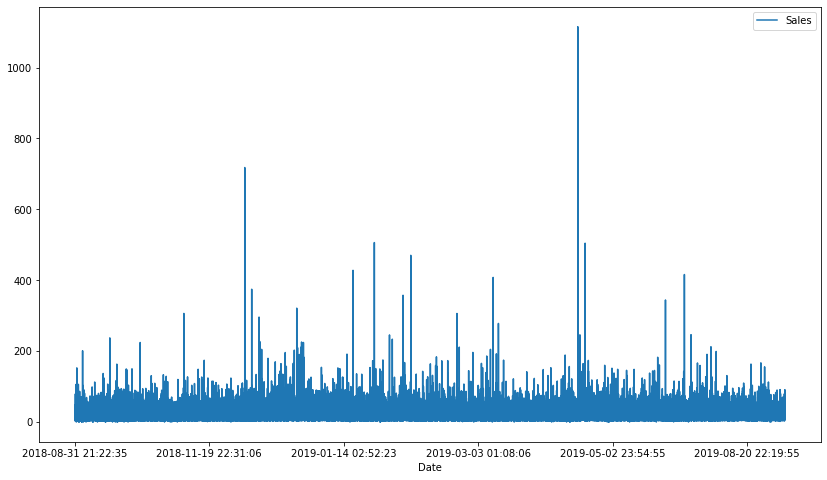

In [9]:
dataset.plot()

In [10]:
dataset.reset_index(level=0, inplace=True)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52815 entries, 0 to 52814
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52815 non-null  object 
 1   Sales   52815 non-null  float64
dtypes: float64(1), object(1)
memory usage: 619.0+ KB


In [12]:
dataset.describe()

,Sales
count,52815.000000
mean,20.919007
std,19.826868
min,0.000000
25%,9.060000
50%,15.440000
75%,26.630000
max,1115.230000


In [13]:
dataset['Date'] = pd.to_datetime(dataset['Date'], infer_datetime_format=True)

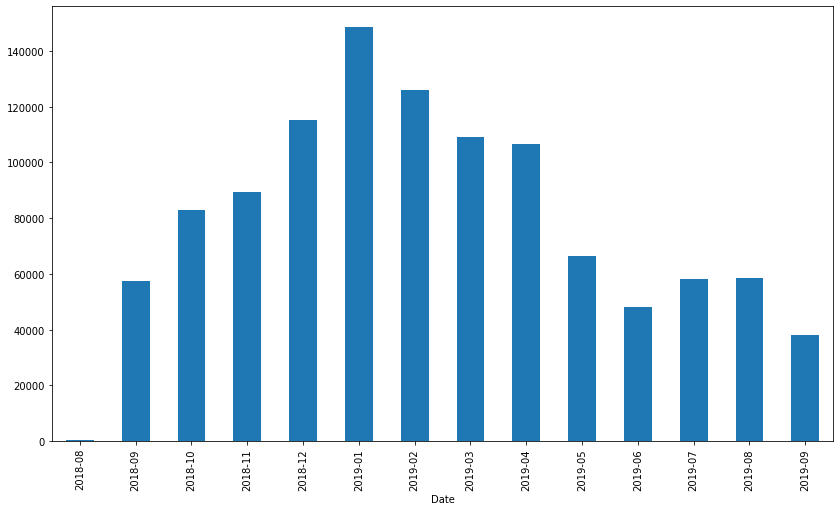

In [14]:
monthly_sales= dataset['Sales'].groupby(dataset['Date'].dt.to_period('M')).sum().plot(kind='bar')

In [15]:
dataset['Sales'].groupby(dataset['Date'].dt.to_period('M')).sum().head(15)

Date
2018-08       431.91
2018-09     57410.14
2018-10     82881.33
2018-11     89330.50
2018-12    115075.19
2019-01    148550.60
2019-02    126062.41
2019-03    109173.95
2019-04    106438.75
2019-05     66331.04
2019-06     48204.18
2019-07     58339.78
2019-08     58521.26
2019-09     38086.34
Freq: M, Name: Sales, dtype: float64

In [16]:
dataset['Sales'].groupby(dataset['Date'].dt.to_period('M')).std().std()

3.476922107423046

In [17]:
dataset['Sales'].groupby(dataset['Date'].dt.to_period('M')).std().mean()

18.603457570417852

In [18]:
dataset['Sales'].groupby(dataset['Date'].dt.to_period('M')).mean().mean()

20.486218548437254

In [19]:
dataset['Sales'].groupby(dataset['Date'].dt.to_period('M')).mean().std()

1.5487632128326834

In [20]:
dataset['Sales'].groupby(dataset['Date'].dt.to_period('M')).sum().sort_values().head(13).mean()

73560.5215384616

In [21]:
dataset['Sales'].groupby(dataset['Date'].dt.to_period('M')).sum().sort_values().head(13).std()

35572.561874106235

In [22]:
dataset['Sales'].groupby(dataset['Date'].dt.to_period('M')).sum().mean()

78916.95571428577

In [23]:
dataset['Sales'].groupby(dataset['Date'].dt.to_period('M')).count().std()

1836.325794372263

In [24]:
monthly_sales = dataset['Sales'].groupby(dataset['Date'].dt.to_period('M')).sum()

In [25]:
monthly_sales.to_csv(r'../SciPY/monthly_sales_dataset.csv')

In [26]:
monthly_sales.sort_values().tail(5)

Date
2019-04    106438.75
2019-03    109173.95
2018-12    115075.19
2019-02    126062.41
2019-01    148550.60
Freq: M, Name: Sales, dtype: float64

In [27]:
monthly_sales.describe()

count        14.000000
mean      78916.955714
std       39620.039945
min         431.910000
25%       57642.550000
50%       74606.185000
75%      108490.150000
max      148550.600000
Name: Sales, dtype: float64

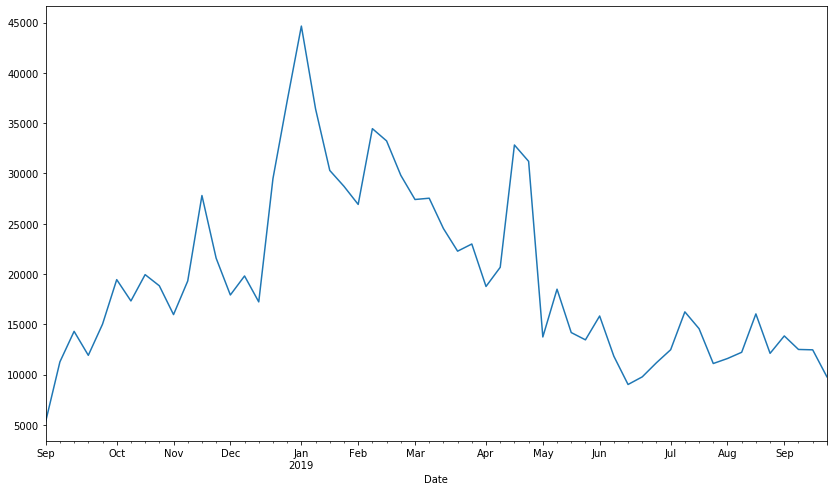

In [28]:
dataset['Sales'].groupby(dataset['Date'].dt.to_period('W')).sum().plot()

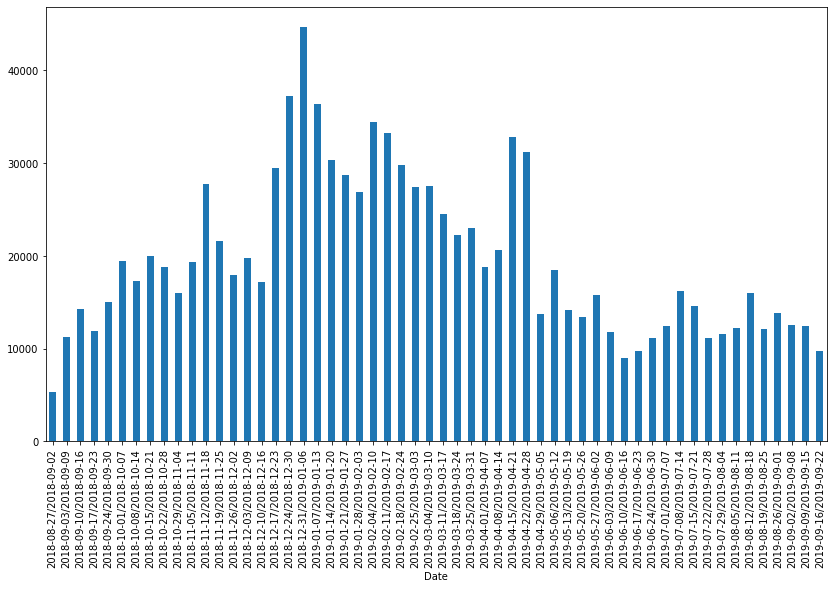

In [29]:
dataset['Sales'].groupby(dataset['Date'].dt.to_period('W')).sum().plot(kind='bar')

In [30]:
dataset['Sales'].groupby(dataset['Date'].dt.to_period('W')).sum().head(60)

Date
2018-08-27/2018-09-02     5345.66
2018-09-03/2018-09-09    11266.40
2018-09-10/2018-09-16    14301.15
2018-09-17/2018-09-23    11919.02
2018-09-24/2018-09-30    15009.82
2018-10-01/2018-10-07    19443.28
2018-10-08/2018-10-14    17323.39
2018-10-15/2018-10-21    19939.50
2018-10-22/2018-10-28    18831.05
2018-10-29/2018-11-04    15968.06
2018-11-05/2018-11-11    19311.18
2018-11-12/2018-11-18    27804.60
2018-11-19/2018-11-25    21575.61
2018-11-26/2018-12-02    17916.83
2018-12-03/2018-12-09    19807.83
2018-12-10/2018-12-16    17230.33
2018-12-17/2018-12-23    29486.23
2018-12-24/2018-12-30    37198.72
2018-12-31/2019-01-06    44649.64
2019-01-07/2019-01-13    36413.86
2019-01-14/2019-01-20    30297.13
2019-01-21/2019-01-27    28720.09
2019-01-28/2019-02-03    26920.85
2019-02-04/2019-02-10    34453.33
2019-02-11/2019-02-17    33234.99
2019-02-18/2019-02-24    29814.50
2019-02-25/2019-03-03    27409.49
2019-03-04/2019-03-10    27537.76
2019-03-11/2019-03-17    24528.31
2019-03-1

In [31]:
weekly_sales = dataset['Sales'].groupby(dataset['Date'].dt.to_period('W')).sum()

In [32]:
weekly_sales.to_csv(r'../SciPY/weekly_sales_dataset.csv')

In [33]:
weekly_sales.sort_values().tail(10)

Date
2018-12-17/2018-12-23    29486.23
2019-02-18/2019-02-24    29814.50
2019-01-14/2019-01-20    30297.13
2019-04-22/2019-04-28    31202.28
2019-04-15/2019-04-21    32828.61
2019-02-11/2019-02-17    33234.99
2019-02-04/2019-02-10    34453.33
2019-01-07/2019-01-13    36413.86
2018-12-24/2018-12-30    37198.72
2018-12-31/2019-01-06    44649.64
Freq: W-SUN, Name: Sales, dtype: float64

In [34]:
weekly_sales.describe()

count       56.000000
mean     19729.238929
std       8603.338623
min       5345.660000
25%      12494.222500
50%      17620.110000
75%      27043.010000
max      44649.640000
Name: Sales, dtype: float64

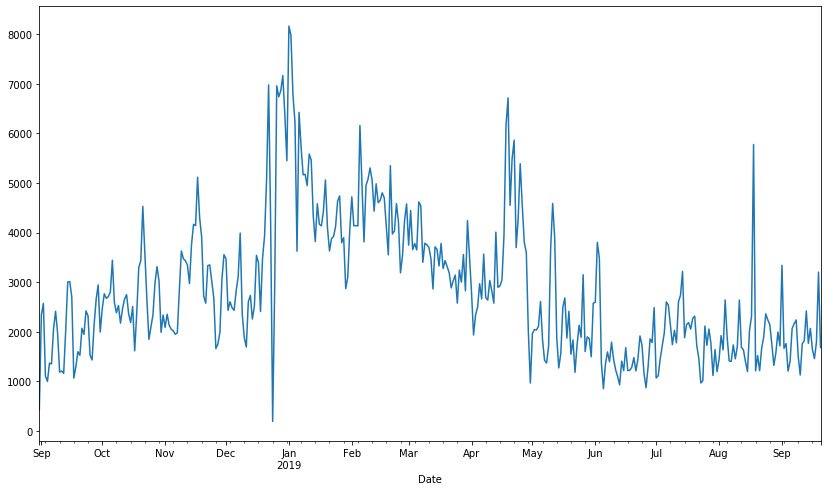

In [35]:
dataset['Sales'].groupby(dataset['Date'].dt.to_period('D')).sum().plot()

In [36]:
daily_sales = dataset['Sales'].groupby(dataset['Date'].dt.to_period('D')).sum()

In [37]:
daily_sales.to_csv(r'../SciPY/daily_sales_dataset.csv')

In [38]:
daily_sales.sort_values().tail(20)

Date
2019-01-12    5466.17
2019-04-21    5487.95
2019-01-11    5584.36
2019-01-07    5736.18
2019-08-18    5778.21
2019-04-22    5864.82
2019-04-18    6160.07
2019-02-05    6160.91
2019-01-04    6221.33
2018-12-30    6375.45
2019-01-06    6427.08
2019-04-19    6718.03
2018-12-27    6739.20
2019-01-03    6781.33
2018-12-28    6862.49
2018-12-26    6960.45
2018-12-22    6980.47
2018-12-29    7169.00
2019-01-02    7978.38
2019-01-01    8166.29
Freq: D, Name: Sales, dtype: float64

In [39]:
daily_sales.describe()

count     386.000000
mean     2862.273005
std      1395.279936
min       191.050000
25%      1777.082500
50%      2577.355000
75%      3694.442500
max      8166.290000
Name: Sales, dtype: float64

In [40]:
hourly_sales = dataset['Sales'].groupby(dataset['Date'].dt.to_period('H')).sum()

In [41]:
hourly_sales

Date
2018-08-31 21:00     49.30
2018-08-31 22:00    163.20
2018-08-31 23:00    219.41
2018-09-01 00:00    580.91
2018-09-01 01:00    482.20
                     ...  
2019-09-19 23:00    417.04
2019-09-20 00:00    452.67
2019-09-20 01:00    466.72
2019-09-20 02:00    602.93
2019-09-20 03:00    159.00
Freq: H, Name: Sales, Length: 3335, dtype: float64

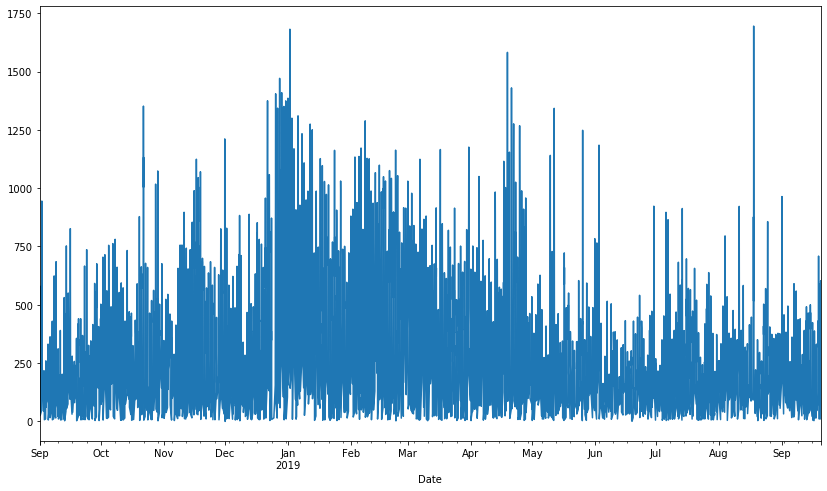

In [42]:
hourly_sales.plot()

In [43]:
hourly_sales.describe()

count    3335.000000
mean      331.285571
std       281.388697
min         0.000000
25%       114.160000
50%       263.780000
75%       464.570000
max      1694.920000
Name: Sales, dtype: float64

In [44]:
hourly_sales.std()

281.38869713858537

In [45]:
hourly_sales.sort_values().head(10)

Date
2018-12-01 04:00    0.00
2019-06-19 07:00    0.52
2019-02-23 04:00    2.46
2018-10-29 03:00    2.76
2018-12-08 09:00    2.83
2018-09-13 05:00    2.89
2018-09-19 03:00    3.04
2019-03-10 19:00    3.20
2019-05-25 20:00    3.23
2019-08-20 04:00    3.48
Freq: H, Name: Sales, dtype: float64

In [56]:
hourly_sales_mean = dataset['Sales'].groupby(dataset['Date'].dt.to_period('H')).mean().sum()

In [46]:
hourly_sales.sort_values(ascending=False).head(10)

Date
2019-08-18 03:00    1694.92
2019-01-02 00:00    1681.49
2019-01-02 01:00    1628.83
2019-01-01 23:00    1609.57
2019-04-19 00:00    1582.26
2018-12-27 23:00    1470.91
2019-04-21 00:00    1429.96
2018-12-28 23:00    1409.52
2018-12-26 00:00    1404.70
2019-01-01 01:00    1385.65
Freq: H, Name: Sales, dtype: float64

In [47]:
hourly_sales.to_csv(r'../SciPY/hourly_sales_dataset.csv')

In [48]:
q_sales = dataset['Sales'].groupby(dataset['Date'].dt.to_period('Q')).sum()

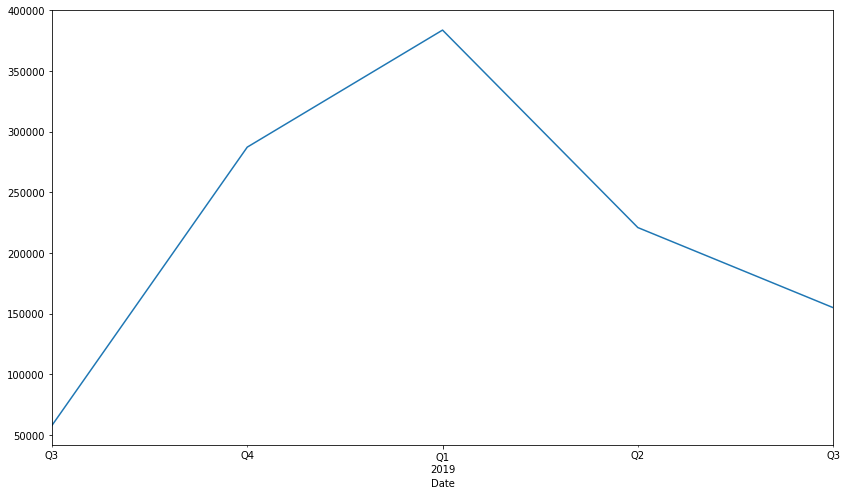

In [49]:
q_sales.plot()

In [50]:
q_sales.describe()

count         5.00000
mean     220967.47600
std      124375.46383
min       57842.05000
25%      154947.38000
50%      220973.97000
75%      287287.02000
max      383786.96000
Name: Sales, dtype: float64

In [51]:
q_sales.head(5)

Date
2018Q3     57842.05
2018Q4    287287.02
2019Q1    383786.96
2019Q2    220973.97
2019Q3    154947.38
Freq: Q-DEC, Name: Sales, dtype: float64

In [52]:
hourly = pd.read_csv('hourly_sales_dataset.csv')

In [96]:
hourly

,Date,Sales
0,2018-08-31 21:00,49.30
1,2018-08-31 22:00,163.20
2,2018-08-31 23:00,219.41
3,2018-09-01 00:00,580.91
4,2018-09-01 01:00,482.20
...,...,...
3330,2019-09-19 23:00,417.04
3331,2019-09-20 00:00,452.67
3332,2019-09-20 01:00,466.72
3333,2019-09-20 02:00,602.93


In [97]:
hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3335 entries, 0 to 3334
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3335 non-null   object 
 1   Sales   3335 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.1+ KB


In [98]:
hourly['Date'] = pd.to_datetime(hourly['Date'], infer_datetime_format=True)

In [99]:
hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3335 entries, 0 to 3334
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3335 non-null   datetime64[ns]
 1   Sales   3335 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 52.2 KB


In [100]:
hourly_monthly = hourly['Sales'].groupby(hourly['Date'].dt.to_period('M')).sum()

In [101]:
hourly_monthly.head()

Date
2018-08       431.91
2018-09     57410.14
2018-10     82881.33
2018-11     89330.50
2018-12    115075.19
Freq: M, Name: Sales, dtype: float64

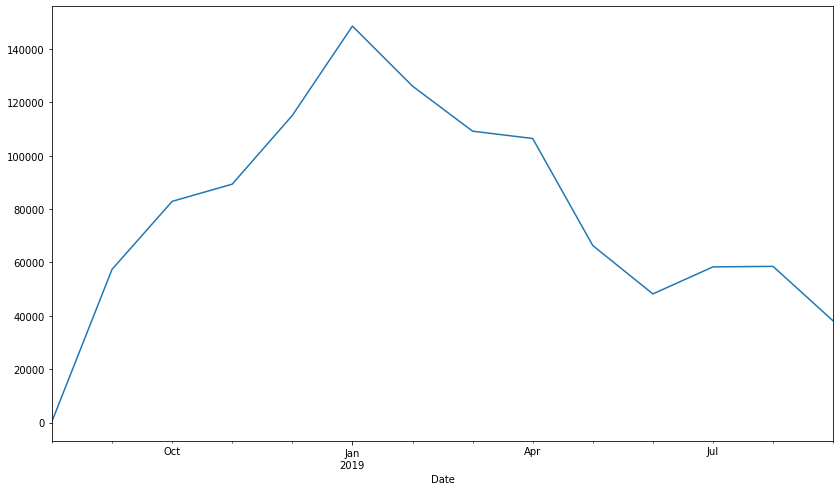

In [102]:
hourly_monthly.plot()